# 🎲 Which game should I choose?

## 📖 Background

After a tiring week, what better way to unwind than a board game night with friends and family? But the question remains: which game should you pick? You have gathered a dataset containing information of over `20,000` board games. It's time to utilize your analytical skills and use data-driven insights to persuade your group to try the game you've chosen!

## 💾 The Data

You've come across a dataset titled `bgg_data.csv` containing details on over `20,000` ranked board games from the BoardGameGeek (BGG) website. BGG is the premier online hub for board game enthusiasts, hosting data on more than `100,000` games, inclusive of both ranked and unranked varieties. This platform thrives due to its active community, who contribute by posting reviews, ratings, images, videos, session reports, and participating in live discussions.

This specific dataset, assembled in `February 2021`, encompasses all ranked games listed on BGG up to that date. Games without a ranking were left out because they didn't garner enough reviews; for a game to earn a rank, it needs a minimum of `30` votes.

In this dataset, each row denotes a board game and is associated with some information.

| Column     | Description              |
|------------|--------------------------|
| `ID` | The ID of the board game. |
| `Name` | The name of the board game.|
| `Year Published` | The year when the game was published.|
| `Min Players` | The minimum number of player recommended for the game.|
| `Max Players` | The maximum number of player recommended for the game.|
| `Play Time` | The average play time suggested by game creators, measured in minutes.|
| `Min Age` | The recommended minimum age of players.|
| `Users Rated` | The number of users who rated the game.|
| `Rating Average` | The average rating of the game, on a scale of 1 to 10.|
| `BGG Rank` | The rank of the game on the BoardGameGeek (BGG) website.| 
| `Complexity Average` | The average complexity value of the game, on a scale of 1 to 5.|
| `Owned Users` |  The number of BGG registered owners of the game.| 
| `Mechanics` | The mechanics used by the game.| 
| `Domains` | The board game domains that the game belongs to.|

**Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

## 💪 Challenge
Explore and analyze the board game data, and share the intriguing insights with your friends through a report. Here are some steps that might help you get started:

* Is this dataset ready for analysis? Some variables have inappropriate data types, and there are outliers and missing values. Apply data cleaning techniques to preprocess the dataset.
* Use data visualization techniques to draw further insights from the dataset. 
* Find out if the number of players impacts the game's average rating.

## 🎲 Ok, so what are we going to play tonight?

### 🧹 Cleaning The Dataset

#### Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'data/bgg_data.csv')

#### Checking For Null Values

Almost 50% of the `Domains` column is null.\
Also around 8% of `Mechanics` is null.\
These are columns with the most null values in that dataset.

It would be really interesting to analyse which domains have been most popular through the years but unfortunately, there is too much-lacking data and I need to drop that column along with the `Mechanics` columns.

In [2]:
temp = pd.DataFrame(index = df.columns)
temp['Datatype'] = df.dtypes
temp['Non null values'] = df.count()
temp['Null values'] = df.isnull().sum()
temp['% of null values'] = df.isnull().mean() * 100
temp['Unique values'] = df.nunique()
temp

,Datatype,Non null values,Null values,% of null values,Unique values
ID,float64,20327,16,0.078651,20327
Name,object,20343,0,0.000000,19976
Year Published,float64,20342,1,0.004916,188
Min Players,int64,20343,0,0.000000,11
Max Players,int64,20343,0,0.000000,54
Play Time,int64,20343,0,0.000000,116
Min Age,int64,20343,0,0.000000,21
Users Rated,int64,20343,0,0.000000,2973
Rating Average,float64,20343,0,0.000000,627
BGG Rank,int64,20343,0,0.000000,20343


In [3]:
df.drop(columns = ['Mechanics', 'Domains'], inplace = True)

I am checking if the `Owned Users` column still have null values and it has.\
Because it is only 23 rows with missing data I am going to drop just these rows.

In [4]:
df[df['Owned Users'].isnull()]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
2828,202755.0,Guildhall Fantasy: Fellowship,2016.0,2,4,45,10,565,7.13,2830,2.00,NaN
3590,196305.0,Guildhall Fantasy: Alliance,2016.0,2,4,45,10,360,7.20,3592,2.14,NaN
3739,196306.0,Guildhall Fantasy: Coalition,2016.0,2,4,45,10,336,7.19,3741,2.13,NaN
5807,289.0,Chariot Lords,1999.0,3,4,360,12,221,6.68,5809,0.03,NaN
9202,6813.0,Operation Market Garden: Descent into Hell,1985.0,2,2,120,12,94,6.72,9204,0.03,NaN
9317,139.0,Hoax,1981.0,3,12,45,10,216,5.97,9319,1.38,NaN
10075,266756.0,Devil Boats: PT Boats in the Solomons,2021.0,1,1,60,14,49,7.84,10077,2.83,NaN
10776,NaN,Ace of Aces: Jet Eagles,1990.0,2,2,20,10,110,6.26,10778,0.02,NaN
10835,NaN,Die Erben von Hoax,1999.0,3,8,45,12,137,6.05,10837,0.02,NaN
11152,NaN,Rommel in North Africa: The War in the Desert ...,1986.0,2,2,0,12,53,6.76,11154,0.04,NaN


In [5]:
df = df.dropna(subset = 'Owned Users')

After dropping 2 columns and 23 rows there is no more null values in dataset and we are ready to choose our game for tonight :)

In [6]:
df.isnull().sum()

ID                    0
Name                  0
Year Published        0
Min Players           0
Max Players           0
Play Time             0
Min Age               0
Users Rated           0
Rating Average        0
BGG Rank              0
Complexity Average    0
Owned Users           0
dtype: int64

It is important to check if there are not duplicated rows in the dataset.

In [7]:
df.duplicated().sum()

0

### 📊 (EDA) Exploratory Data Analysis

#### Basic Information About Dataset

It is a good idea to look at the best-rated and worst-rated games. 

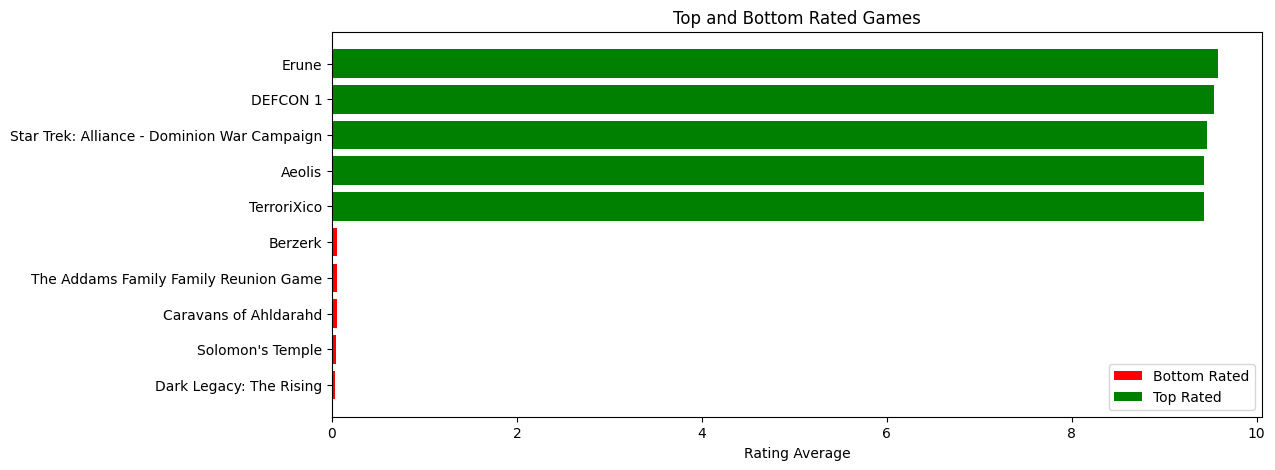

In [8]:
df1 = df.sort_values(by = 'Rating Average', ascending = True)
plt.figure(figsize = (12, 5))
plt.barh(df1.head(5)['Name'], df1.head(5)['Rating Average'], color = 'red', label = 'Bottom Rated')
plt.barh(df1.tail(5)['Name'], df1.tail(5)['Rating Average'], color = 'green', label = 'Top Rated')
plt.title('Top and Bottom Rated Games')
plt.xlabel('Rating Average')
plt.legend(loc = 'lower right')

Most of the games do not have an age limit. So even if there are children with us tonight we have a wide choice. Only 1% of games are designed specifically for adults.

Text(0.5, 1.0, 'Distribution of Minimum Age Limit')

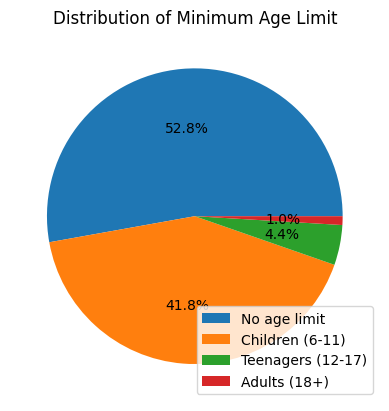

In [9]:
bins = [0, 5, 11, 17, 100]
labels = ['No age limit', 'Children (6-11)', 'Teenagers (12-17)', 'Adults (18+)']
x = pd.cut(df['Min Age'], bins = bins, labels = labels) #Creating age brackets
plt.pie(x.value_counts(), autopct='%1.1f%%')
plt.legend(labels = labels, loc='lower right')
plt.title('Distribution of Minimum Age Limit')

The distribution of game ratings exhibits left-sided asymmetry, indicating the concentration of rates on the higher end of the scale. That suggests a significant proportion of games in the dataset are receiving favorable ratings.

There can be multiple reasons for that:
-  Majority of BCG users are from the United States - Americans are more willing to give higher rates
-  People who already took their time to play the game even if they are not satisfied will be more willing to give a higher rate
- People choose games that have already been tested and recommended, because of that a small group of very popular games can distort the result

Text(0.5, 1.0, 'Distribution of Game Ratings')

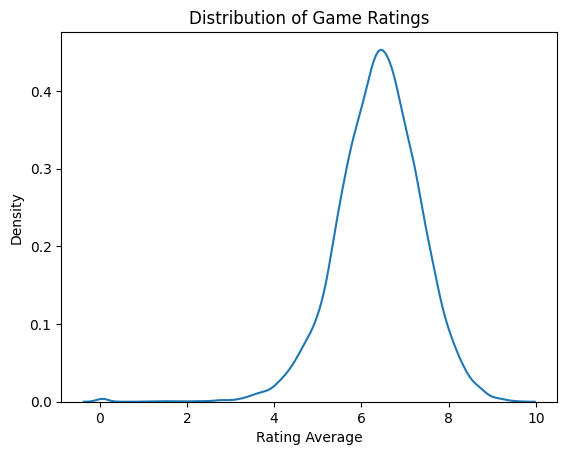

In [10]:
sns.kdeplot(df['Rating Average'])
plt.title('Distribution of Game Ratings')

#### Correlations 

Creating a heatmap is the fastest way to check correlations between variables. 

There is a significant correlation between` Rating Average` and `Complexity Average`, I will evaluate later these correlations. 

There is also a pretty natural thing like a positive correlation between` Complexity Average` and `Min Age`. Games for adults are more complex than for younger gamers. 

The interesting thing is that there is a positive correlation between `Rating Average` and `Min Age`, it follows that if the game is for older gamers is receives better ratings, but probably it is because only 1% of games are created for adults and these games usually are well designed. So it is not true that games for younger gamers are worse, there are just more games for them and some of them are not great.

Text(0.5, 1.0, 'Correlation Heatmap')

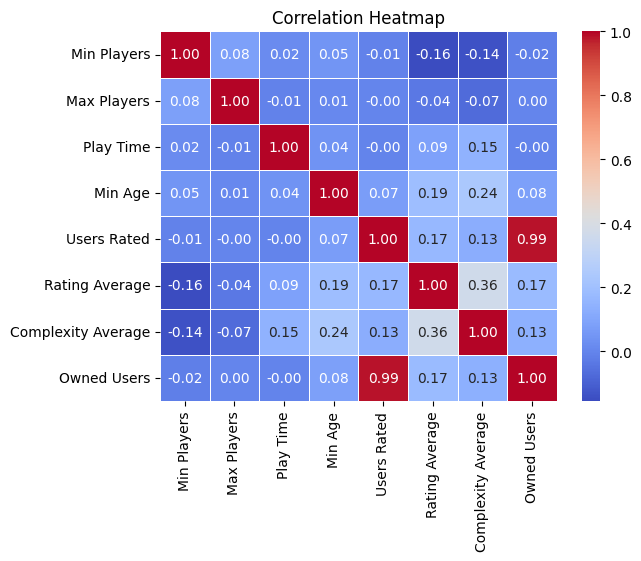

In [11]:
columns = ['Min Players', 'Max Players', 'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'Complexity Average', 'Owned Users']
matrix = df[columns].corr()
sns.heatmap(data = matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.4)
plt.title('Correlation Heatmap')

There is a positive correlation between rating and the complexity of the game. Games that are more complex are getting better ratings than others. Usually, complex games have new mechanics and people can enjoy playing innovative games than the games with old and already-tested mechanics.

Text(0.5, 1.0, 'Correlation Between The Rating and Complexity of The Game')

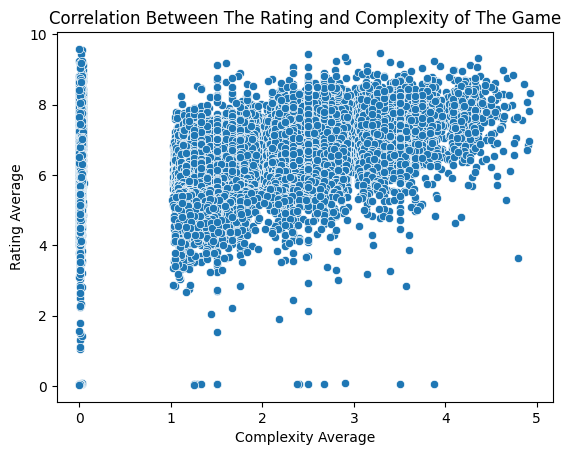

In [12]:
sns.scatterplot(data = df, x = 'Complexity Average', y = 'Rating Average')
plt.xlabel('Complexity Average')
plt.ylabel('Rating Average')
plt.title('Correlation Between The Rating and Complexity of The Game')

Games are getting better average ratings if more people will rate them. That can confirm theory from the distribution of game ratings that people are willing to choose already recommended and tested games and only a small group of gamers will look for new, untested games. 

Text(0.5, 1.0, 'Relationship Between The Number of Users Who Rated a Game and Its Average Rating')

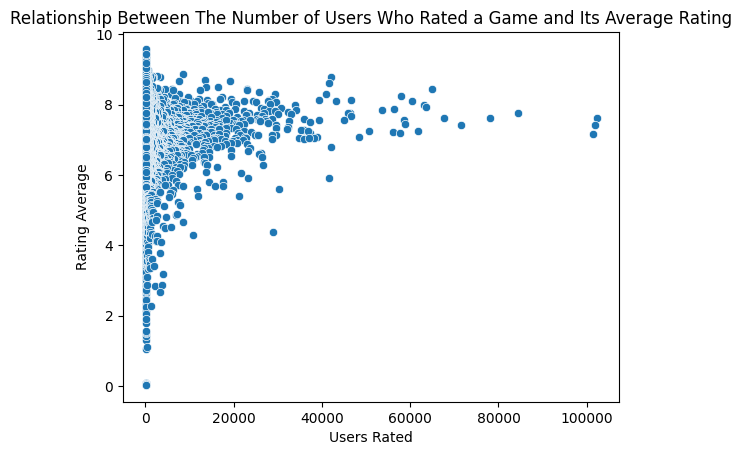

In [13]:
sns.scatterplot(x = df['Users Rated'], y = df['Rating Average'])
plt.title('Relationship Between The Number of Users Who Rated a Game and Its Average Rating')

#### Trends Across The Years

I decided to take into consideration only XX and XXI centuries because in the dataset there were some games from thousands of years ago and the graph wouldn't show the grow of popularity of board games. 

In the graph below we can see that the number of games published each year started to grow around 1970 and it spiked at the begging of the XXI century. In 2020 there was a massive drop in probably because of the Covid-19 pandemic some companies rescheduled their premieres for the next years.

Text(0.5, 1.0, 'How Has The Number of Board Games Published Each Year Changed in XX and XXI Centuries')

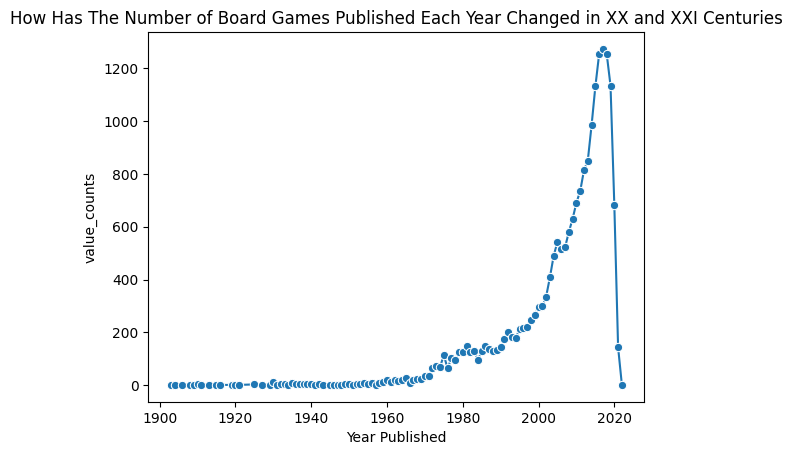

In [14]:
df1 = df[df['Year Published'] >= 1901]
data = df1.groupby('Year Published').size().reset_index(name='value_counts')
sns.lineplot(data=data, x='Year Published', y='value_counts', marker='o')
plt.title('How Has The Number of Board Games Published Each Year Changed in XX and XXI Centuries')

The reason why I took into consideration data from the XX and XXI centuries is similar to the previous graph. Because of some old games, it will be impossible to see changes in recent years.

We can see that average complexity at the beginning of the XX century was very variable. Around 1990 it started to stabilize at 1,5 level. In recent years we have observed a steady slow fall in average complexity. One of the reasons for that can be the growing number of games published each year.

Text(0.5, 1.0, 'Trends in Average Complexity of Board Games in XX and XXI centuries')

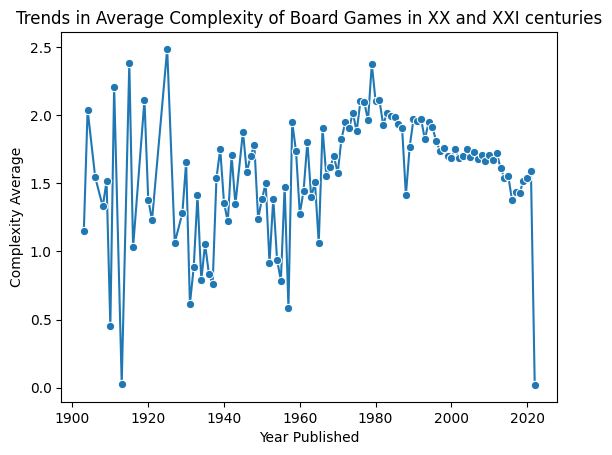

In [15]:
df1 = df[df['Year Published'] >= 1901]
data = df1.groupby('Year Published')['Complexity Average'].mean().reset_index()
sns.lineplot(data = data, x = 'Year Published', y = 'Complexity Average', marker = 'o')
plt.title('Trends in Average Complexity of Board Games in XX and XXI centuries')

### 🎉 Conclusion

So tonight it is best for us to choose a complex game that is popular among gamers and if there are younger gamers with us there will be no problem because there are a lot of games for younger audiences. 

The market for board games is still growing and in the next years, we are going to see more and more fantastic games that are waiting for us.